In [25]:
import os, sys, shutil
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from tqdm.notebook import tqdm

In [2]:
# 레이블 불러오기
label = pd.read_csv('./labels.csv')

In [4]:
label

,id,breed
0,78c7b5a2dd1c9612ae14bf9e326090e6,miniature_schnauzer
1,8b332e46e140af54feecbdff46cad87b,old_english_sheepdog
2,f441dc37af37eb01c9fa3e0950228642,ibizan_hound
3,a7702c83da79d54e27d2e9b1f01fe64e,pug
4,2f811d41fd9d4195785dc0f65c26125a,rhodesian_ridgeback
...,...,...
10680,cdb32ac86d0475b5d32667582acaf267,shih-tzu
10681,c417aa964d70adaa3cd866b7b1bc9e92,pug
10682,032620ae0f847d957d94d1fd76cb17e8,dhole
10683,e5064451d5ce1b406452427679281bbc,saluki


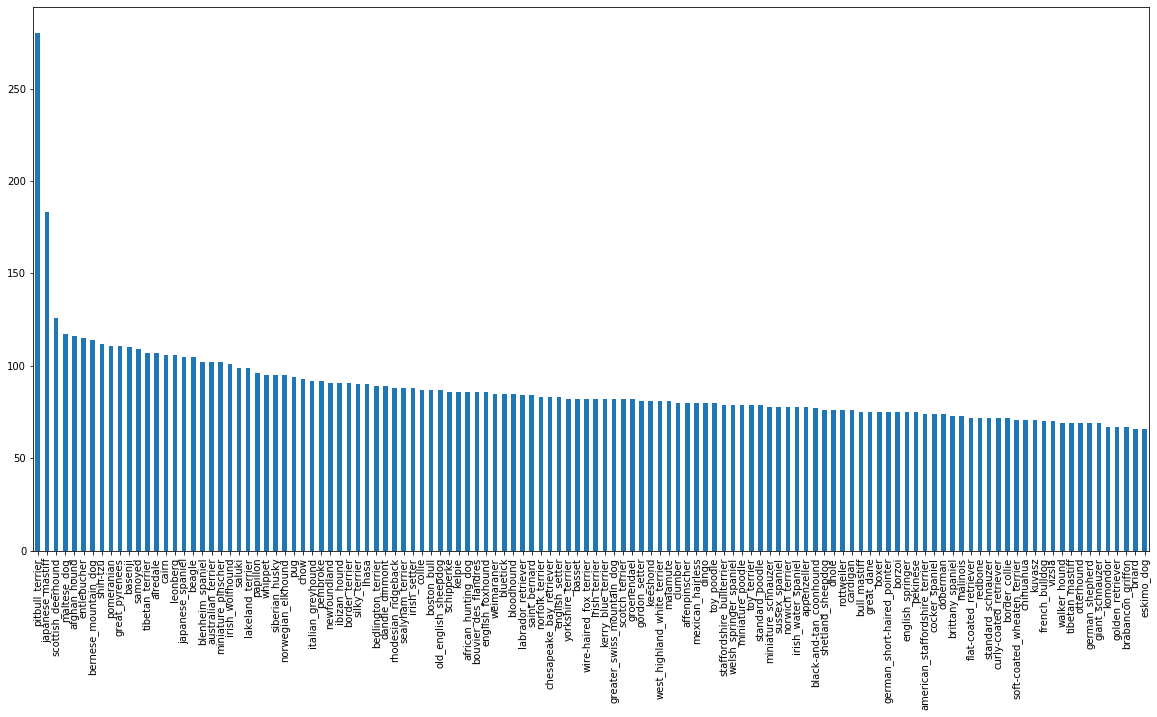

In [3]:
# 레이블의 강아지 품종 분포 확인
label['breed'].value_counts().plot.bar(figsize=(20,10))

In [5]:
# 강아지 122품종
unique_label = np.unique(label['breed'])

In [9]:
filenames = [filename for filename in label['id']]

In [12]:
tmpX, test_X, tmpY, test_Y = train_test_split(filenames, label['breed'],
                                              test_size=0.2,
                                              shuffle=True,
                                              stratify=label['breed'],
                                              random_state=319)

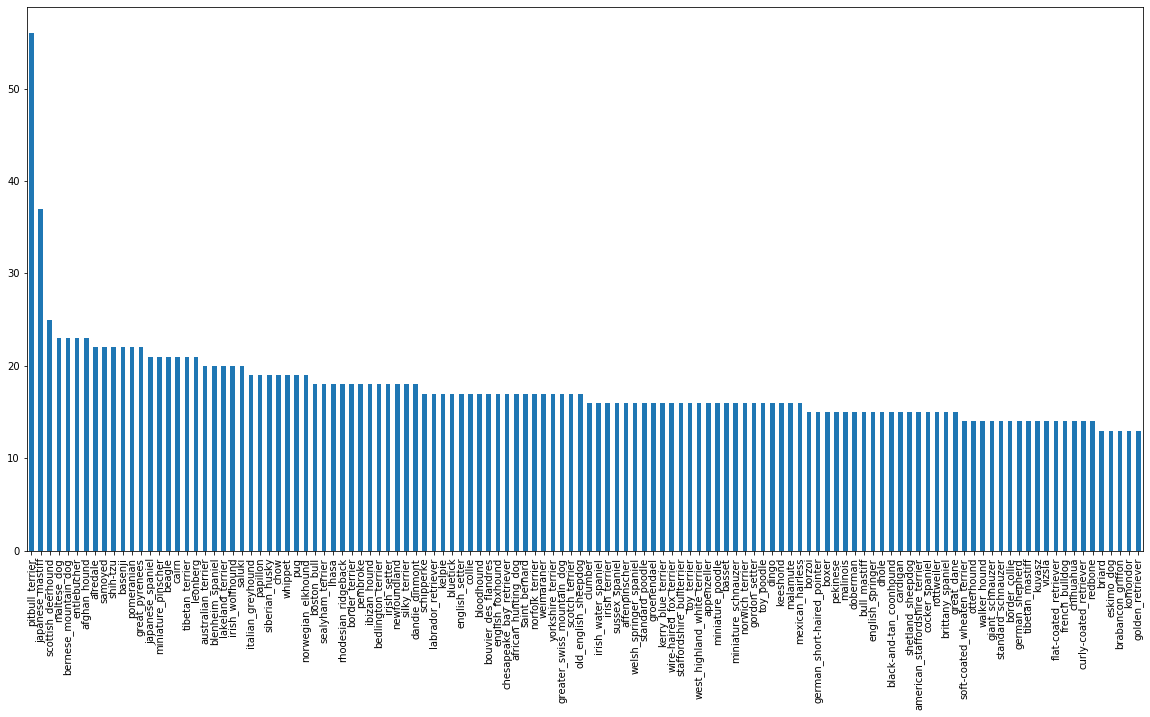

In [14]:
test_Y.value_counts().plot.bar(figsize=(20, 10))

In [15]:
train_X, val_X, train_Y, val_Y = train_test_split(tmpX, tmpY,
                                                  test_size=0.25,
                                                  shuffle=True,
                                                  stratify=tmpY)

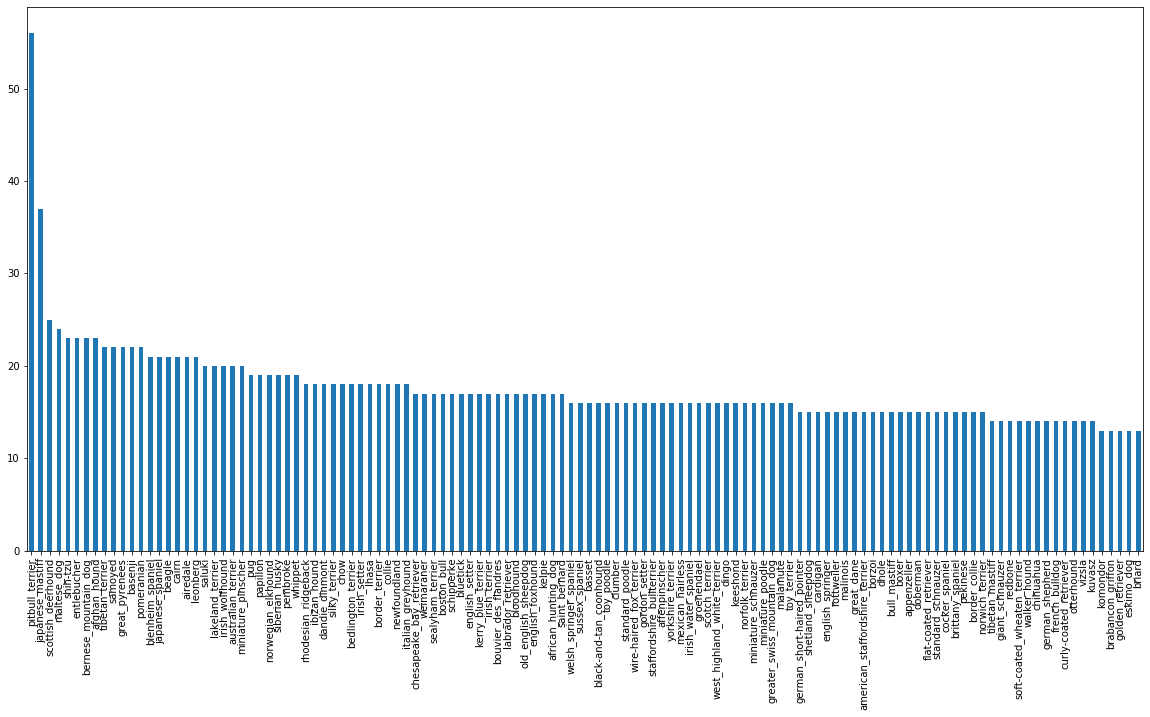

In [16]:
val_Y.value_counts().plot.bar(figsize=(20, 10))

In [21]:
train = pd.DataFrame({'id':train_X, 'breed':train_Y})
val = pd.DataFrame({'id':val_X, 'breed':val_Y})
test = pd.DataFrame({'id':test_X, 'breed':test_Y})

In [45]:
# train 폴더로 6,411장 이미지 복사
origin_path = './dog_breed'

for breed in tqdm(np.unique(train['breed']).tolist()):
    path = './dataset/train/' + breed
    os.mkdir(path)
    new_path = './dataset/train/' + breed 
    for fname in train[train['breed'] == breed]['id']:
        fname = fname + '.jpg'
        src = os.path.join(origin_path, fname)
        dst = os.path.join(new_path, fname)
        shutil.copyfile(src, dst)

In [46]:
# val 폴더로 2,137장 이미지 복사
origin_path = './dog_breed'

for breed in tqdm(np.unique(val['breed']).tolist()):
    path = './dataset/val/' + breed
    os.mkdir(path)
    new_path = './dataset/val/' + breed 
    for fname in val[val['breed'] == breed]['id']:
        fname = fname + '.jpg'
        src = os.path.join(origin_path, fname)
        dst = os.path.join(new_path, fname)
        shutil.copyfile(src, dst)

In [47]:
# test 폴더로 2137장 이미지 복사
origin_path = './dog_breed'

for breed in tqdm(np.unique(test['breed']).tolist()):
    path = './dataset/test/' + breed
    os.mkdir(path)
    new_path = './dataset/test/' + breed 
    for fname in test[test['breed'] == breed]['id']:
        fname = fname + '.jpg'
        src = os.path.join(origin_path, fname)
        dst = os.path.join(new_path, fname)
        shutil.copyfile(src, dst)